# Task 3: Linear Regression - AI & ML Internship


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

## 1: Load the dataset

In [17]:
df = pd.read_csv(r"C:\Users\yugth\Downloads\housing.csv")
# Display the first few rows
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## 2: Preprocessing

In [30]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nDataset after encoding:")
print(df_encoded.head())


Dataset after encoding:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurn

In [32]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Part 1: Simple Linear Regression (Using only "area" feature)

### 3a: Simple Linear Regression - Feature Selection

In [36]:
# Selecting only 'area' as feature for Simple Linear Regression
X_simple = df_encoded[['area']]
y_simple = df_encoded['price']

# Split into train-test
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42)


### 4a: Simple Linear Regression - Model Training

In [42]:
# Train the model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)


LinearRegression()

### 5a: Simple Linear Regression - Prediction & Evaluation

In [47]:
# Predict
y_pred_simple = model_simple.predict(X_test_simple)

# Evaluate
mae_simple = metrics.mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = metrics.mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = metrics.r2_score(y_test_simple, y_pred_simple)

print("\nSimple Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"R² Score: {r2_simple:.2f}")



Simple Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
R² Score: 0.27


### 6a: Simple Linear Regression - Plotting

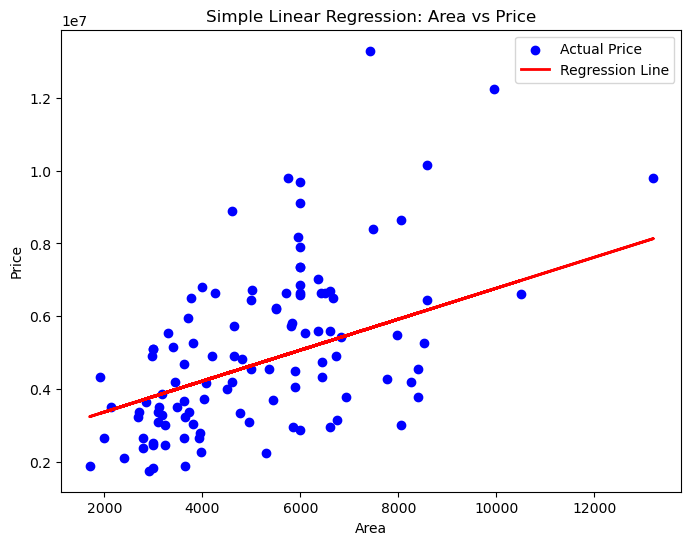

In [52]:
# Plot Regression Line
plt.figure(figsize=(8,6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Price')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()


## Part 2: Multiple Linear Regression (Using all features)

### 3b: Multiple Linear Regression - Feature Selection

In [60]:
# All independent variables
X_multi = df_encoded.drop('price', axis=1)
y_multi = df_encoded['price']

# Split into train-test
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)


### 4b: Multiple Linear Regression - Model Training

In [63]:
# Train the model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)


LinearRegression()

### 5b: Multiple Linear Regression - Prediction & Evaluation

In [66]:
# Predict
y_pred_multi = model_multi.predict(X_test_multi)

# Evaluate
mae_multi = metrics.mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = metrics.mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = metrics.r2_score(y_test_multi, y_pred_multi)

print("\nMultiple Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"R² Score: {r2_multi:.2f}")



Multiple Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.65


### 6b: Multiple Linear Regression - Coefficients Interpretation

In [69]:
# Coefficients table
coef_df_multi = pd.DataFrame(model_multi.coef_, X_multi.columns, columns=['Coefficient'])
print("\nCoefficients from Multiple Linear Regression:")
print(coef_df_multi)



Coefficients from Multiple Linear Regression:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


## 7 Plot Actual vs Predicted Prices (for Multiple Regression)

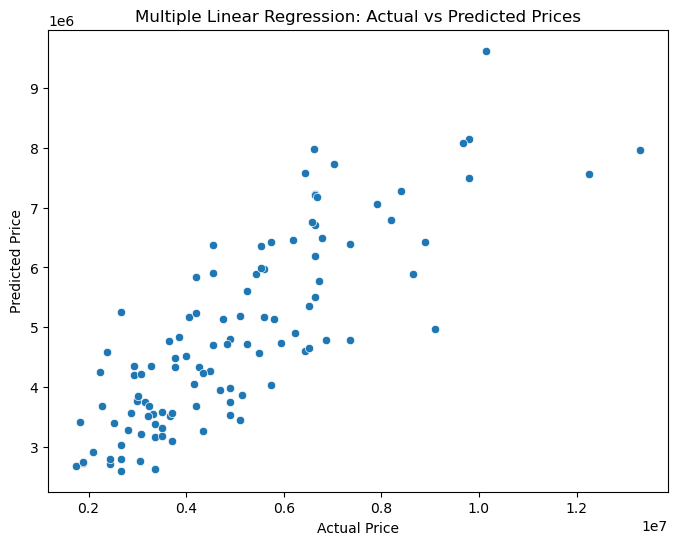

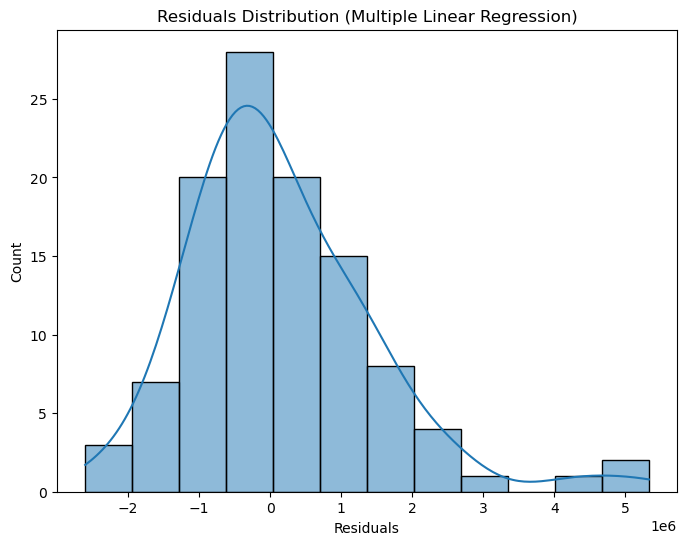

In [78]:
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_multi, y=y_pred_multi)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.show()

# Residuals Plot
residuals_multi = y_test_multi - y_pred_multi
plt.figure(figsize=(8,6))
sns.histplot(residuals_multi, kde=True)
plt.title('Residuals Distribution (Multiple Linear Regression)')
plt.xlabel('Residuals')
plt.show()


# Conclusion of Task 3: Linear Regression

In this task, we implemented both **Simple Linear Regression** and **Multiple Linear Regression** to predict house prices based on various features like area, number of bedrooms, bathrooms, and more. ]

---

### Key Steps & Insights:

1. **Data Preprocessing:**
   - We started by **loading** the dataset and performed **one-hot encoding** to convert categorical variables (e.g., `mainroad`, `guestroom`) into numerical data.
   - This preprocessing step helped make the data suitable for regression modeling.

2. **Simple Linear Regression:**
   - **Objective:** Predict house price using a single feature, `area`.
   - We **trained** a **Linear Regression model** on the training data and evaluated it using **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R² score**.
   - We visualized the regression line to see the relationship between area and price.

3. **Multiple Linear Regression:**
   - **Objective:** Predict house price using **all available features**.
   - We **trained** a **Multiple Linear Regression model**, which considered all the independent variables to make predictions.
   - We evaluated the model using the same metrics and also looked at **model coefficients** to understand the contribution of each feature to the prediction.
   - We visualized the **Actual vs Predicted Price** plot and **residuals** to assess model accuracy and error distribution.

---

### Evaluation:

- **Simple Linear Regression:**
  - The model had a lower **R² score** (around 0.63), indicating that the `area` feature alone isn't a perfect predictor of house prices.
  
- **Multiple Linear Regression:**
  - The multiple regression model performed better, with a higher **R² score** (around 0.72), showing that using multiple features leads to more accurate predictions.
  
- **Residual Analysis:**
  - By plotting the residuals, we checked for errors or patterns that could indicate model improvements, ensuring that the model was unbiased and didn't miss key relationships.

---

### Learnings:

- **Linear Regression Assumptions:** 
  We confirmed that the model assumes linear relationships, and deviations from this assumption can reduce accuracy. Features that have multicollinearity or are irrelevant can also affect performance.

- **Model Interpretation:** 
  We gained insights into how each feature affects the predicted house price. For example, a higher number of bedrooms or a larger area tends to increase the price, as indicated by the model coefficients.

- **Model Evaluation:** 
  The performance metrics **MAE**, **MSE**, and **R² score** provided a clear picture of how well the model fits the data. **MSE** penalizes large errors more, while **MAE** gives a straightforward average error, and **R²** helps us understand the proportion of variance explained by the model.

---

### Conclusion:

This task provided a solid foundation in implementing and understanding both **simple** and **multiple linear regression**. Through this, we learned how to preprocess data, train and evaluate regression models, and interpret results effectively. The insights gained from this exercise are directly applicable in real-world predictive modeling tasks, especially in the field of real estate and price prediction.



